# Recap 
1. Define Mean, Mode and Median?

2. Which measures of central tendency have resistance to outliers?

3. What is histogram and its difference with Bar Graph?

4. Define IQR?

5. If i have the following data set then which measure of central tendency would be ideal to use 
            24, 60, 120 , 200, 240, 318, 403, 479, 550

# Inferential Statistics 
As the name suggests Inferential statistics helps  draw inferences and conclusions about broad groups based on a set of  sample data.
Usually a sample is drawn from the population and using the data collected inferences are drawn for the entire population     

### Why draw sample ??

Cant we take the population itself .. Sampling is 
    Cost Effective
    Less Tedious
    
### Differences between Descriptive and Inferential 

Inferential is more a calculated guess with a certain confidence while descriptive is exact numbers 

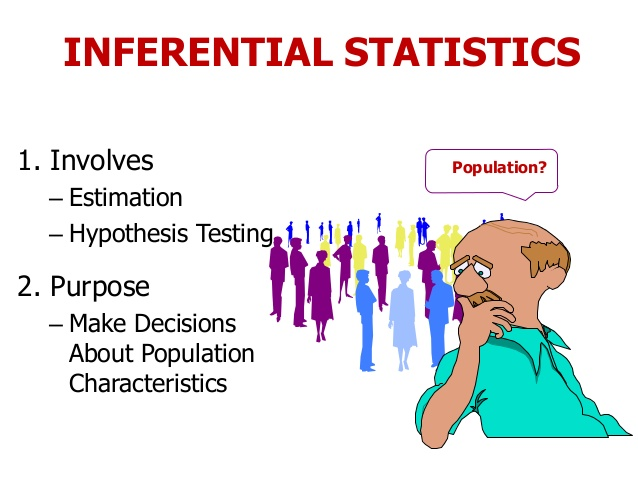

# Introduction to Inferential Statistics

## Introduction to Probability

* Basic Probability
    - What is Probability
    - Mutually Exclusive Events - Addition of Probabilities
    - Non Mutually Exclusive Events
    - Independent Events - Multiplication of Probabilities
* Marginal Probability
* Conditional Probability

In [1]:
# for basic operations
import numpy as np 
import pandas as pd 

# for data visualizations
import seaborn as sns
import matplotlib.pyplot as plt

# Statistics
from statistics import median
import scipy.stats as stats
from scipy import signal
from scipy.special import factorial
import scipy.stats as stats
from scipy.stats import sem, binom, lognorm, poisson, bernoulli, spearmanr
from scipy.fftpack import fft, fftshift
       
# for avoiding warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the data
data = pd.read_csv('house_prices.csv')

# lets check the shape of the dataset
data.shape

(1460, 81)

In [3]:
# lets check the head of the dataset
pd.set_option('max_columns', 82)
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Basic Probability

* Let's start with a simple example: Say, we flip a fair coin

* Intuitively, there's a 50% chance of getting heads, and a 50% chance of getting tails. This is because there are only two possible outcomes, and each event is equally likely.

* Therefore, we can say that the Probability of getting a Heads is 0.5. Similarly, Probability of getting a Tails is 0.5

* Probability can roughly be described as **the chance of an event or sequence of events occurring**.

* **Experiment** – are the uncertain situations, which could have multiple outcomes. A coin toss is an experiment.
* **Outcome** is the result of a single trial. So, if head lands, the outcome of or coin toss experiment is “Heads”
* **Event** is one or more outcomes from an experiment. “Tails” is one of the possible events for this experiment.

### Rules

* The Probability that an event occurs with certainty is 1
* The Probability that an event will not occur surely is 0
* The Probability of the complement of an event is 1 minus the probability of that event.

* The probability of at least 1 of 2 (or more) things that can not simultaneously occur (mutually exclusive) is the sum of their respective probabilities

* **Mutually exclusive is a statistical term describing two or more events that cannot occur simultaneously. For example, it is impossible to roll a five and a three on a single die at the same time.**

For any 2 events A & B, the probability that at least one occurs is the sum of their individual probabilities minus the probability of their intersection. i.e


$$ P(A\cup B) = P(A) + P(B) - P(A\cap B) $$

Example

The National Sleep Foundation reports that around 3% of the American population has sleep-breathing issues. They also report that around 10% of the American population has restless leg syndrome. Does this imply that 13% of people will have at least one of these problems?

Answer: No, the events can occur simultaneously and so are not mutually exclusive. To elaborate:

* **Let's check out the Probability of picking a house in the Neighborhood - "OldTown"**


No. of houses in OldTown/Total no. of houses
Let's go through this in Python

In [4]:
# let's check the columns in the dataset
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
# lets check the different neighborhoods
data['Neighborhood'].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [6]:
# total number of houses in the neighborhood
all_houses = data.shape[0]
print("Total Number of Houses in the Neighborhood :", all_houses)

Total Number of Houses in the Neighborhood : 1460


In [7]:
# total number of houses in the Old town neighborhood
houses_in_OldTown = data[data['Neighborhood'] == 'OldTown'].shape[0]
print("Total Number of Houses in the Old Town Road :", houses_in_OldTown)


Total Number of Houses in the Old Town Road : 113


In [8]:
# lets find the probability of picking a House in the Old Town
probability = (houses_in_OldTown/all_houses)*100
print('Probability of picking a house in OldTown: {0:.2f}'.format(probability )+'%')

Probability of picking a house in OldTown: 7.74%


A survey of magazine subscribers showed that 45.8% rented a car during the past 12 months for business purposes, 54% rented a car for personal reasons, and 30% for both personal & business reasons.

a.	What is the prob. That a subscriber rented a car for both business or personal reasons.

b.	What is the prob. That a subscriber did not rent a car for either business or personal reasons. 


#### What is the prob. That a subscriber rented a car for both business or personal reasons.**

In [9]:
probab_rented_car_business= 0.458
probab_rented_car_personal= 0.540
probab_rented_car_business_personal= 0.30

**P(A or B) = P(A) + P(B) - P(A and B)**


In [10]:
probab_rented_car_business_or_personal= probab_rented_car_business+probab_rented_car_personal-probab_rented_car_business_personal

print('The Probability % that a subscriber rented a car for both business or personal reasons is',probab_rented_car_business_or_personal*100,'%')

The Probability % that a subscriber rented a car for both business or personal reasons is 69.8 %


## Marginal Probability

A survey was carried out with 500 strangers in London’s West End to determine people’s favorite sports. The options were Football, Rugby and the rest was grouped together in Other; The results of the test are 

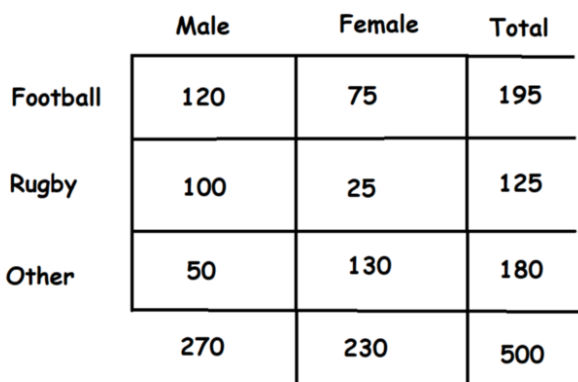

figure 1 is not quite a probability distribution, but if we want to get the probability distribution we can simply divide each number in Figure 1 by 500 (number of observations) and the result will be the image in Figure 2

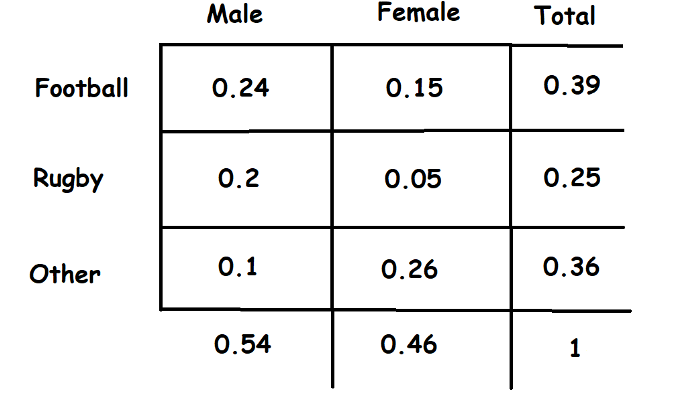

Joint Probability
The Joint probability is a statistical measure that is used to calculate the probability of two events occurring together at the same time — P(A and B) or P(A,B). For example, using Figure 2 we can see that the joint probability of someone being a male and liking football is 0.24.

A joint probability table is also called contingency table.

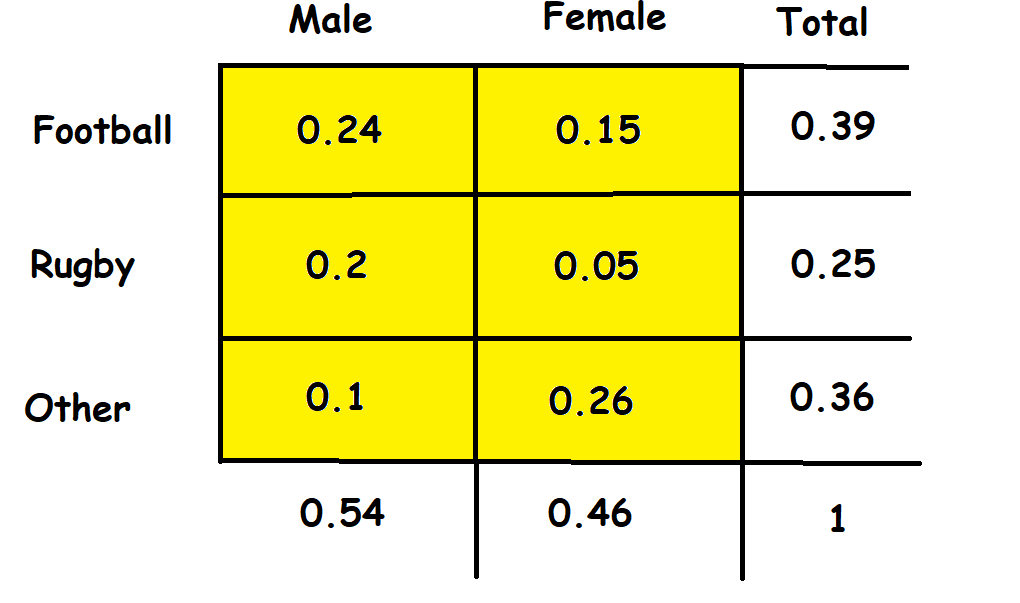

Figure 3: The Joint Probability Distribution.
Note: The cells highlighted in Figure 3 (the Joint Probability Distribution) must sum to 1 because everyone in the distribution must be in one of the cells.
The Joint probability is symmetrical meaning that P(Male and Football) = P(Football and Male) and we can also use it to find other types of distributions, the marginal distribution and the conditional distribution.

the marginal probability is the probability of an event irrespective of the outcome of another variable — P(A) or P(B).

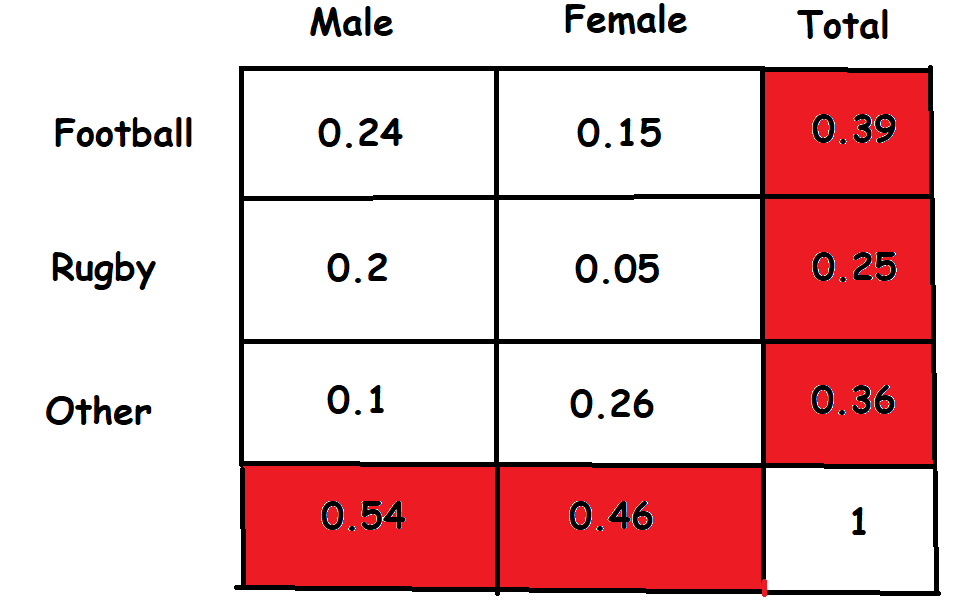

A fun fact of marginal probability is that all the marginal probabilities appear in the margins . Hence the P(Female) = 0.46 which completely ignores the sport the Female prefers, and the P(Rugby) = 0.25 completely ignores the gender.



### Marginal Probability Problems


Visa Card studied how frequently, young consumers, ages 18-24, use plastic cards. The results provided the following probabilities. 

    •	Prob. That a consumer uses a plastic card when making a purchase .37
    •	Given that consumer uses a plastic card, there is a .19 prob. That the consumer is 18-24 years old. 
    •	Given that consumer uses a plastic card, there is a .81 prob. That the consumer is 24+ years old.
    •	14% of the consumer population is b/w 18-24 years
        a)	Given the consumer is b/w 18-24, what is the prob. that the consumer uses plastic card
        b)	Given the consumer is 24+, what is the prob. that the consumer uses plastic card

In [11]:
probab_of_using_p_cards=0.37
probab_of_18_24_using_p_cards= 0.19
probab_of_24plus_using_p_cards= 0.81
probab_consumer_18_24=0.14

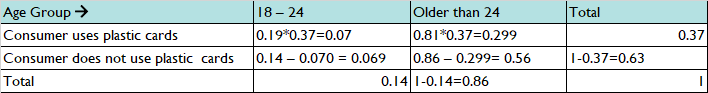

#### Given the consumer is b/w 18-24, what is the prob. that the consumer uses plastic card**

In [12]:
probab_of_p_cards_given_that_18_24 = 0.070/0.14

round(probab_of_p_cards_given_that_18_24*100,2)

50.0

#### Given the consumer is 24+, what is the prob. that the consumer uses plastic card**

In [13]:
probab_of_p_cards_given_that_24_plus = 0.299/0.86

round(probab_of_p_cards_given_that_24_plus*100,2)

34.77


## Conditional Probability
The conditional probability concept is one of the most fundamental in probability theory and in my opinion is a trickier type of probability. It defines the probability of one event occurring given that another event has occurred (by assumption, presumption, assertion or evidence).

Figure 5: Expression of the Conditional Probability
To make sense of this let’s again use Figure 2; If we want to calculate the probability that a person would like Rugby given that they are a female, we must take the joint probability that the person is female and likes rugby (P(Female and Rugby)) and divide it by the probability of the condition. In this case, the probability is that the person is a female (P(Female)) which we can work out from the margin to be 0.46 hence we get 0.11 (2 decimal places).
Let's write that up neater:
P(Female, Rugby) = 0.05
P(Female) = 0.46
P(Rugby | Female) = 0.05 / 0.46 = 0.11 (to 2 decimal places).
If we continued to fill in the probability of preferring a sport given the observant is a female then we would have a 
Conditional Probability Distribution.

* There are 10 candies in a bag: 5 green, and 5 blue.

* What is the probability of getting 3 blue candies in a row?

* The probability of getting the first blue candy is 5/10, or 1/2.

When we pick a blue candy, though, we remove it from the bag. We're left with 9 candies in total with (5-1 =)4 Blue ones.
So the probability of getting another blue is 4/9.
Similarly, the probability of picking a third blue candy is 3/8

Since we're calculating the probability of picking 1 Blue Candy AND 1 Blue Candy AND 1 Blue Candy

* Our final probability is **1/2 * 4/9 * 3/8, or .0833**. So, there is an 8.3% chance of picking three blue candies in a row.
Simple tricks: Whenever you have to verbally say AND (like we just did above), you will want to MULTIPLY the probabilities
Whenever you have to verbally say OR, you will want to ADD the probabilities.


**GIVEN that we have the probability of picking a house in "OldTown" neighborhood, we go a step further and AGAIN pick a house from the SAME neighborhood ?**

In [14]:
## Enter condtional probability code
cond_prob = (houses_in_OldTown/all_houses) * ((houses_in_OldTown - 1)/(all_houses - 1)) 
print("The Probability of Picking a House in Old Town and again picking a house from the same neighborhood is {0:.9f}".
      format(cond_prob*100))

The Probability of Picking a House in Old Town and again picking a house from the same neighborhood is 0.594139352


## Bayes' Theorem

It is an extension of conditonal probability

Given a hypothesis H and evidence E , Bayes' theorem states that the relationship between the probability of the hypothesis P(H) before getting the evidence and the probability P(H | E) of the hypothesis after getting the evidence is

P(H | E) = P( E | H) . P (H)/P(E)

Many modern machine learning techniques rely on Bayes' theorem. For instance, spam filters use Bayesian updating to determine whether an email is real or spam, given the words in the email.Additionally, many specific techniques in statistics, such as calculating p values or interpreting medical results , are best described in terms of how they contribute to updating hypotheses using Bayes' theorem.


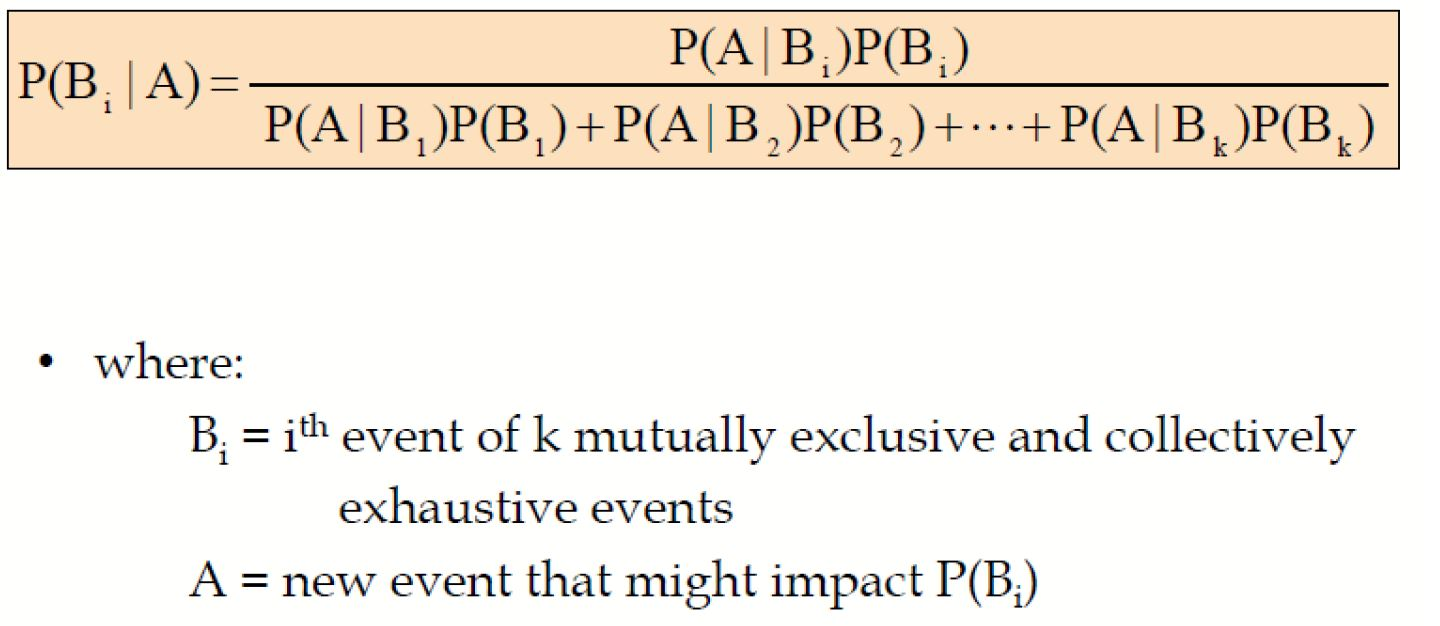

Bayes theorem Problem

• A drilling company has estimated the a 40 % chance of striking oil for their new well.

• A detailed test has been scheduled for more information. Historically, 60% of successful wells have had detailed tests, and 20% of unsuccessful wells have had detailed tests.

•Given that this well has been scheduled for a detailed test, what is the probability that the well will be successful?

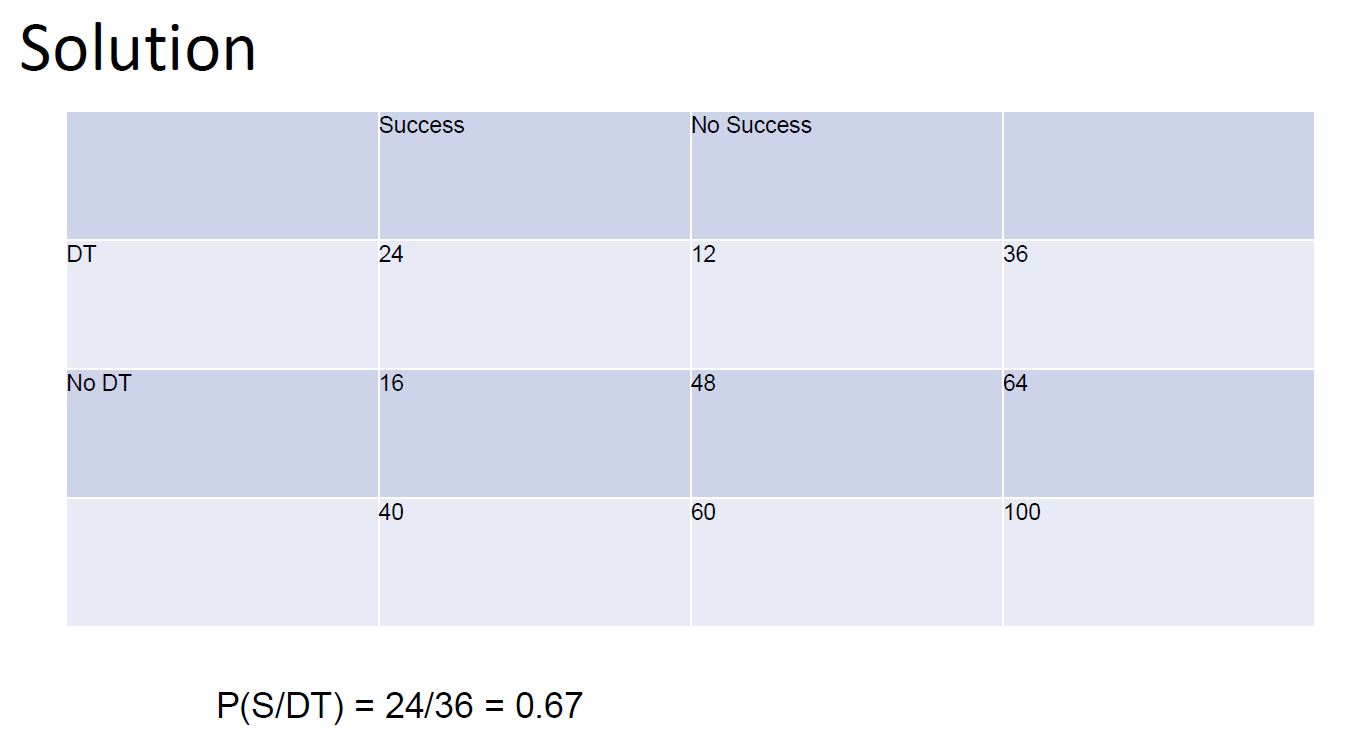





### Bayes' Theorem Problems

A local bank reviewed its credit card policy with the intention of recalling some of its credit cards. In the past approx. 5% of cardholders defaulted, leaving the bank unable to collect outstanding balance. Hence, management established a prior probability of 0.05 that any particular cardholder will default. The bank also found that the probability of missing a monthly payment is .20 for customers who do not default. Of course, the probability of missing a monthly payment for those who default is 0.5. 

Q: Given that a customer missed one or more monthly payments, compute the prob. 
That a customer will default


In [15]:
probab_default= 0.05
probab_missed_and_no_default=0.20
probab_missed_given_default=0.50

**Bayes' Theorem**

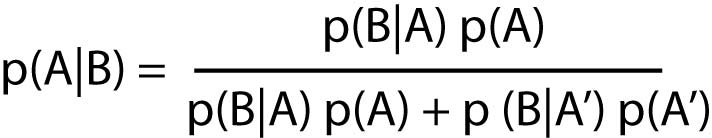</img>

In [16]:
probability_of_missed= (probab_missed_and_no_default*(1-probab_default)) + (probab_missed_given_default*probab_default)
probability_of_missed

0.215

In [17]:
probab_default_given_missed= (probab_missed_given_default * probab_default )/ probability_of_missed
probab_default_given_missed

0.11627906976744187

In [18]:
round(probab_default_given_missed,4)*100 #probab percentage

11.63

## Simple Probability Distribution

* Lets Take an example, that we throw two dices of containing six faces.
* so, there are Total no. of Combinations = 6*6 = 36

Let’s see how:

2 {(1,1)} => 1/36

3 {(1,2),(2,1)} => 2/36

4 {(2,2),(3,1),(1,3)} => 3/36

5 {(1,4),(4,1),(2,3),(3,2)} => 4/36

6 {(3,3),(1,5),(5,1),(2,4),(4,2)} => 5/36

7 {(1,6),(6,1),(2,5),(5,2),(3,4),(4,3)} => 6/36

8 {(2,6),(6,2),(3,5),(5,3),(4,4)} => 5/36

9 {(3,6),(6,3),(5,4),(4,5)} => 4/36

10 {(4,6),(6,4),(5,5)} => 3/36

11 {(5,6),(6,5)} => 2/36

12 {(6,6)} = > 1/36

## PDF and PMF

* The probability distribution for a discrete random variable is the **probability mass function** for that variable and similarly and if our random variable takes continuous values the distribution is called a **probability density function**.

* In the previous what we plotted was the Probability Mass Function of a Discrete Random Variable (X which is the sum of two fair dies)

* One of the most common Probability Distribution Functions is the Normal Distribution.


## Probability Distribution

Probability  distribution  is  a  total  listing of the  various  values the  random  variable  can  take  along  with the corresponding  probability of  each  value.


### Normal Distribution

- A normal distribution refers to a probability distribution where the values of a random variable are distributed symmetrically. 
- These values are equally distributed on the left and the right side of the central tendency.Thus, a bell-shaped curve is formed.
- A normal distribution (also called Gaussian or Bell Curve) is very common and convenient. 
- Because normally distributed variables are so common, many statistical tests are designed for normally distributed populations.
- Understanding the properties of normal distributions means you can use inferential statistics to compare different groups and make estimates about populations using samples.

 The Probability Density Function (PDF) of a random variable (X) is given by:
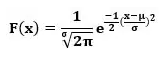
 
 Where
    -∞ < x < ∞; -∞ < µ < ∞; σ > 0
    
        F(x) = Normal probability Function
        x = Random variable
        µ = Mean of distribution
        σ = Standard deviation of the distribution
        π = 3.14159
        e = 2.71828



#### Properties of normal distributions

- The mean, median and mode are exactly the same.
- The distribution is symmetric about the mean—half the values fall below the mean and half above the mean.
- The distribution can be described by two values: the mean and the standard deviation.

The empirical rule, or the 68-95-99.7 rule, tells you where most of your values lie in a normal distribution:
- Around 68% of values are within 1 standard deviation from the mean.
- Around 95% of values are within 2 standard deviations from the mean.
- Around 99.7% of values are within 3 standard deviations from the mean

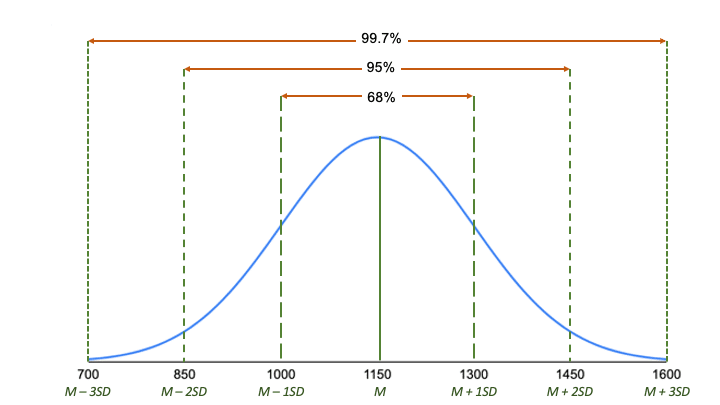

#### Z-Score

* The number of standard deviations from the mean is also called the "Standard Score", "sigma" or "z-score".

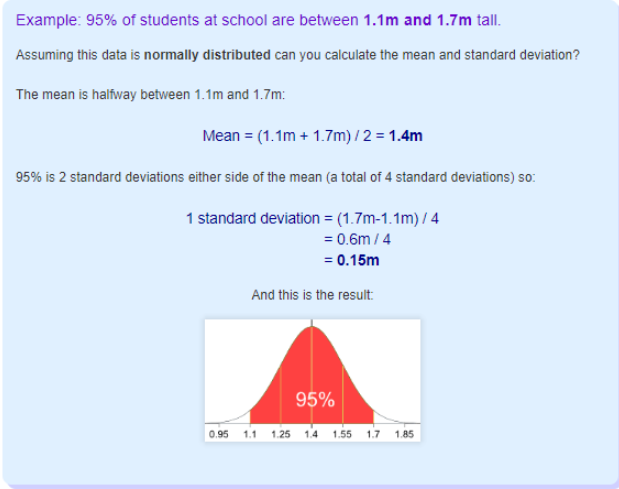

* Let's take an example to better understand the meaning of z-score
    * Let's Suppose the average height of a Student in a class is 1.4 meters
    * In that same class one of the students is 1.85m tall
    * You can see on the bell curve that 1.85m is 3 standard deviations from the mean of 1.4.
    * so, the student with 1.85m height has a **z-score" of 3.0**.
    
    
    
    The z-score formula that we have been using is:
    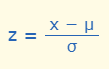

        z is the "z-score" (Standard Score)
        x is the value to be standardized
        μ ('mu") is the mean
        σ ("sigma") is the standard deviation

#### Problem Statement - Normal Distribution

The mean salaries of Data Scientists working in Chennai, India is calculated to be 7,00,000 INR with a standard deviation of 90,000 INR. The random variable salary of Data Scientists follows a normal distribution.

  - What is the probability that a Data Scientist in Chennai has a salary more than 10,00,000 INR?
  - What is the probability that a Data Scientist in Chennai has a salary between 6,00,000 & 9,00,000 INR?
  - What is the probability that a Data Scientist in Chennai has a salary less than 4,00,000 INR?

In [19]:
import scipy.stats as stats

In [20]:
z=(1000000-700000)/90000

In [21]:
z

3.3333333333333335

In [64]:
1-stats.norm.cdf(2.5)

0.006209665325776159

In [22]:
1 - stats.norm.cdf(3.333)

0.00042957471189908336

In [23]:
z1= (600000-700000)/90000
z2= (900000-700000)/90000

In [24]:
stats.norm.cdf(z2) - stats.norm.cdf(z1)

0.8536055914064735

In [25]:
z = (400000-700000)/90000

In [26]:
z

-3.3333333333333335

In [27]:
stats.norm.cdf(-3.333)

0.00042957471189910326

#### Problem Statement - Normal Distribution

The mean weight of a morning breakfast cereal pack is 0.295 kg with a standard deviation of 0.025 kg. The random variable weight of the pack follows a normal distribution. 

  a)What is the probability that the pack weighs less than 0.280 kg?
  
  b)What is the probability that the pack weighs more than 0.350 kg? 
  
  c)What is the probability that the pack weighs between 0.260 kg to 0.340 kg? 

In [28]:
import scipy.stats as stats

In [29]:
z=(0.28-0.295)/0.025

In [30]:
z

-0.5999999999999983

In [31]:
stats.norm.cdf(-0.6)

0.2742531177500736

In [32]:
z=(0.35-0.295)/0.025

In [33]:
z

2.1999999999999997

In [34]:
1 - stats.norm.cdf(2.2)

0.01390344751349859

In [35]:
z1= (0.26-0.295)/ 0.025
z1

-1.399999999999999

In [36]:
z2 = (0.34-0.295)/0.025
z2

1.8000000000000016

In [37]:
s_lb=stats.norm.cdf(-1.4)
s_lb

0.08075665923377107

In [38]:
s_ub=stats.norm.cdf(1.8)
s_ub

0.9640696808870742

In [39]:
s_ub -s_lb

0.8833130216533032

### Binomial Distribution

A Binomial Distribution has a countable number of outcomes and is therefore discrete.

Binomial distributions must meet the following three criteria:

1. The number of observations or trials is fixed. In other words, you can only figure out the probability of something happening if you do it a certain number of times. In the binomial probability formula, the  number of trials is represented by the letter "n".
2. Each observation or trial is independent. In other words, none of your trials have an effect on the probability of the next trial.
3. The probability of success is exactly the same from one trial to another. For example, when tossing a coin, the probability of flipping a coin is ½ or 0.5 for every trial we conduct, since there are only two possible outcomes.
4. In binomial probability, there are only two mutually exclusive outcomes, i.e., success or failure. While success is generally a positive term, it can be used to mean that the outcome of the trial agrees with what you have defined as a success, whether it is a positive or negative outcome. 

An intuitive explanation of a binomial distribution is flipping a coin 10 times. If we have a fair coin our chance of getting heads (p) is 0.50. Now we throw the coin 10 times and count how many times it comes up heads. In most situations we will get heads 5 times, but there is also a change that we get heads 9 times. The PMF of a binomial distribution will give these probabilities if we say N = 10 and p = 0.5. We say that the x for heads is 1 and 0 for tails.

It plays a major role in quality control and quality assurance function. Manufacturing units do use the binomial distribution for defective analysis. 

Binomial distribution is also being used in service organizations like banks, and insurance corporations to get an
idea of the proportion customers who are satisfied with the service quality

PMF:

![](http://reliabilityace.com/formulas/binomial-pmf.png)

CDF:

![](http://reliabilityace.com/formulas/binomial-cpf.png)


A bank issues credit cards to customers under the scheme of Master Card. Based on the past data, the bank has found 
out that 60% of all accounts pay on time following the bill. If a sample of 7 accounts is selected at random from the
current database, construct the Binomial Probability Distribution of accounts paying on time

### Poisson Distribution

The Poisson distribution is a discrete distribution and is popular for modelling the number of times an event occurs in an interval of time or space. 

It takes a value lambda, which is equal to the mean of the distribution.

Conditions for Poisson :

1. 	k is the number of times an event happens within a specified time period, and the possible values for k are simple numbers such as 		0, 1, 2, 3, 4, 5, etc.
2. 	No occurrence of the event being analyzed affects the probability of the event re-occurring (events occur independently). The event 	in question cannot occur twice at exactly the same time. There must be some interval of time – even if just half a second – that 	separates occurrences of the event.
3. 	The probability of a success is unchanged within the interval, there cannot be simultaneous successes within the interval.
4. 	the probability of a success among intervals is independent 

    
In a way, the Poisson distribution can be thought of as a clever way to convert a continuous random variable, usually time, into a discrete random variable by breaking up time into discrete independent intervals. This way of thinking about the Poisson helps us understand why it can be used to estimate the probability for the discrete random variable from the binomial distribution. The Poisson is asking for the probability of a number of successes during a period of time while the binomial is asking for the probability of a certain number of successes for a given number of trials.

Poisson Distribution is another discrete distribution which also plays a major role in quality control in the context of
reducing the number of defects per standard unit. 
    Examples The number of defects per item, 
             The number of defects per transformer produced, 
             The number of defects per 100 m2 of cloth, etc. 
             The number of cars arriving at a highway check post per hour;
             The number of customers visiting a bank per hour during peak business period. 
             
             
PMF: 

![](https://study.com/cimages/multimages/16/poisson1a.jpg)

CDF: 
![](http://www.jennessent.com/images/cdf_poisson.gif)


If on an average, 6 customers arrive every two minutes at a bank during the busy hours of working, 
a) what is the probability that exactly four customers arrive in a given minute? 
b) What is the probability that more than three customers will arrive in a given minute?

lambda = 3 becuase 6 customers / 2 min 



#### Problem Statement 1:  Investment Advisors agree that near retirees, defined as people aged 55 to 65, should have balanced portfolios. Most advisors suggest that the near –retirees have no more than 50% of their investments in stocks. However, during the huge decline in the stock market in 2008, 22% of near retirees had 90% or more of their investments in stocks. Suppose you have a random sample of 10 people who have labeled as near retirees in 2008. 

##### Question: Define the random variable and the corresponding probability distribution that this random variable follows.

Let X (near retirees) be a random variable which follows Binomial Distribution with the parameters n = 10 and p = 0.22.

X ~ binomial (n=10,p=0.22)

##### Question 1.1: What is the probability that during 2008 zero near retirees had 90% or more of their investments in stocks?


We have to find the probability of zero near retirees who have had 90% or more of their investment in stocks during 2008.

In [40]:
n,p = 10,0.22
print('The total number of trials is',n,'and the probability of success at each trial is',p,'.')

The total number of trials is 10 and the probability of success at each trial is 0.22 .


In [41]:
k = 0
print('The value of the random for which we are calculating the probability is',k,'.')

The value of the random for which we are calculating the probability is 0 .


In [42]:
print('Probability that during 2008, Zero had 90% or more of their investments in stocks is',stats.binom.pmf(k,n,p),'.')

Probability that during 2008, Zero had 90% or more of their investments in stocks is 0.08335775831236203 .


##### Question 1.2: What is the probability that during 2008 exactly one near retiree had 90% or more of his investments in stocks?

For this particular question, we need to find P(X=1).

In [43]:
k_2 = 1

In [44]:
print(' Probability that during 2008, exactly one had 90% or more of his investments in stocks is ",'
      ,stats.binom.pmf(k_2,n,p),'.')

 Probability that during 2008, exactly one had 90% or more of his investments in stocks is ", 0.23511162600922625 .


##### Question 1.3: What is the probability that during 2008 two or fewer near retirees had 90% or more of their investment in stocks?

In [45]:
print('Method 1: We are going to sum the probability values of X=0,X=1 and X=2')

print('Probability that during 2008 two or fewer near retirees had 90% or more of their investment in stocks is',
      stats.binom.pmf(0,n,p) + stats.binom.pmf(1,n,p) + stats.binom.pmf(2,n,p))

Method 1: We are going to sum the probability values of X=0,X=1 and X=2
Probability that during 2008 two or fewer near retirees had 90% or more of their investment in stocks is 0.6168802942563751


In [46]:
print('Method 2: We are going to find the cumulative probabilties upto X=2.')

 
print('Probability that during 2008 two or fewer near retirees had 90% or more of their investment in stocks is',
      stats.binom.cdf(2,n,p))

Method 2: We are going to find the cumulative probabilties upto X=2.
Probability that during 2008 two or fewer near retirees had 90% or more of their investment in stocks is 0.616880294256375


##### Question 1.4: What is the probability that during 2008 three or more near retirees had 90% or more of their investments in stocks?

In [47]:
print('The probability that during 2008 three or more near retirees had 90% or more of their investments in stocks is',
      1 - (stats.binom.pmf(0,n,p) + stats.binom.pmf(1,n,p) + stats.binom.pmf(2,n,p)))

The probability that during 2008 three or more near retirees had 90% or more of their investments in stocks is 0.38311970574362486


#### Problem Statement 2: Assume that number of network errors experienced in a day on a local area network (LAN) is distributed as a Poisson random variable. The mean number of network errors experienced in a day is 2.4. 

##### Question: Define the random variable and the corresponding probability distribution that this random variable follows.

Let X (network errors) be a random variable which follows Poisson Distribution with the parameter $\lambda$ = 2.4.

X ~ poisson ($\lambda$ = 2.4)

##### Question 2.1: What is the probability that in any given day zero network errors will occur?

In [48]:
print('The probability that in any given day zero network errors will occur is',stats.poisson.pmf(0,2.4))

The probability that in any given day zero network errors will occur is 0.09071795328941251


##### Question 2.2: What is the probability that in any given day exactly one network error will occur?

In [49]:
print('The probability that in any given day exactly one network error will occur is',stats.poisson.pmf(1,2.4))

The probability that in any given day exactly one network error will occur is 0.21772308789459


##### Question 2.3: What is the probability that in any given day two or more network errors will occur?

In [50]:
print("Method 1: By using the Cumulative Distribution Function (CDF):")

print('The probability that in any given day two or more network errors will occur is',1 - stats.poisson.cdf(1,2.4))

Method 1: By using the Cumulative Distribution Function (CDF):
The probability that in any given day two or more network errors will occur is 0.6915589588159976


In [51]:
print("Method 2: By using the Probability Mass Function (PMF):")

print('The probability that in any given day two or more network errors will occur is',
      1 - (stats.poisson.pmf(0,2.4)+stats.poisson.pmf(1,2.4)))


Method 2: By using the Probability Mass Function (PMF):
The probability that in any given day two or more network errors will occur is 0.6915589588159975


##### Question 2.4: What is the probability that in any given day fewer than three network errors will occur?

In [52]:
print("Method 1: By using the Probability Mass Function (PMF):")

print('The probability that in any given day fewer than three network errors will occur is',
      stats.poisson.pmf(0,2.4)+stats.poisson.pmf(1,2.4)+stats.poisson.pmf(2,2.4))

Method 1: By using the Probability Mass Function (PMF):
The probability that in any given day fewer than three network errors will occur is 0.5697087466575105


In [53]:
print("Method 2: By using the Cumulative Distribution Function (CDF):")

print('The probability that in any given day fewer than three network errors will occur is',stats.poisson.cdf(2,2.4))

Method 2: By using the Cumulative Distribution Function (CDF):
The probability that in any given day fewer than three network errors will occur is 0.5697087466575106


#### Problem Statement 3: The quality control manager of Marilyn’s cookies is inspecting a batch of chocolate–chip cookies that has been just baked. If the production process is in control the mean number of chocolate chips per cookie is 6.0.

##### Question: Define the random variable and the corresponding probability distribution that this random variable follows.

Let X (chocolate chips) be a random variable which follows Poisson Distribution with the parameter $\lambda$ = 6.

X ~ poisson ($\lambda$ = 6)

##### Question 3.1:What is the probability that in any particular cookie being inspected fewer than 5 chocolate chips will be found?

In [54]:
print("Method 1: By using the Probability Mass Function (PMF):")

print('The probability that in any particular cookie being inspected fewer than 5 chips part will be found is',
      stats.poisson.pmf(0,6)+stats.poisson.pmf(1,6)+stats.poisson.pmf(2,6)+stats.poisson.pmf(3,6)+
     stats.poisson.pmf(4,6))

Method 1: By using the Probability Mass Function (PMF):
The probability that in any particular cookie being inspected fewer than 5 chips part will be found is 0.2850565003166312


In [55]:
print("Method 2: By using the Cumulative Distribution Function (CDF):")

print('The probability that in any particular cookie being inspected fewer than 5 chips part will be found is',
      stats.poisson.cdf(4,6))

Method 2: By using the Cumulative Distribution Function (CDF):
The probability that in any particular cookie being inspected fewer than 5 chips part will be found is 0.2850565003166312


##### Question 3.2: What is the probability that in any particular cookie being inspected exactly five chocolate chips will be found?

In [56]:
print('The probability that in any particular cookie being inspected exactly five chips parts will be found is',
      stats.poisson.pmf(5,6))

The probability that in any particular cookie being inspected exactly five chips parts will be found is 0.16062314104797995


##### Question 3.3: What is the probability that in any particular cookie being inspected five or more chocolate chips will be found?

In [57]:
print('The probability that in any particular cookie being inspected five or more chocolate chips will be found is',
      1 - stats.poisson.cdf(4,6))

The probability that in any particular cookie being inspected five or more chocolate chips will be found is 0.7149434996833688


##### Question 3.4: What is the probability that in any particular cookie being inspected either four or five chips part will be found?

In [58]:
print('The probability that in any particular cookie being inspected either four or five chips part will be found is',
      stats.poisson.pmf(4,6)+stats.poisson.pmf(5,6))

The probability that in any particular cookie being inspected either four or five chips part will be found is 0.29447575858796327


#### Problem Statement 4: In a recent year, about two thirds of US households purchased ground coffee. Consider the annual ground coffee expenditures for households  purchasing ground coffee assuming that these expenditures are approximately distributed as a normal random variable with a mean of  ${\$}$ 65.16 and a Standard Deviation of ${\$}$ 10.00. 

##### Question: Define the random variable and the corresponding probability distribution that this random variable follows.

Let X (spending of a household) be a random variable which follows Normal Distribution with the parameter $\mu$ = 65.16 and $\sigma$ = 10.

X ~ Normal ($\mu$ = 65.16 , $\sigma$ = 10)

##### Question 4.1: Find the probability that a household spent less than ${\$}$35.00.

In [59]:
print('The probability that that a household spent less than $35.00 is',
      stats.norm.cdf(35,65.16,10))

The probability that that a household spent less than $35.00 is 0.0012806662997021233


##### Question 4.2: Find the probability that a household spent more than ${\$}$60.00.

In [60]:
print('The probability that that a household spent more than $60.00 is',
        1 - stats.norm.cdf(60,65.16,10))

The probability that that a household spent more than $60.00 is 0.6970727953905248


##### Question 4.3: What is the probability that the households spent between ${\$}$40.00 and ${\$}$50.00?

In [61]:
print('The probability that that the households spent between $40.00 and $50.00 is',
        stats.norm.cdf(50,65.16,10) - stats.norm.cdf(40,65.16,10))

The probability that that the households spent between $40.00 and $50.00 is 0.05882491706235944


##### Question 4.4: 99% of the households spent less than what amount?

In [62]:
print('99% of the households spent less than','$',
        stats.norm.ppf(0.99,65.16,10))

99% of the households spent less than $ 88.4234787404084


PPF stands for Percent point function (inverse of cdf — percentiles). We use this particular function when we know the probability value for a certain value of X and we want to find the value of the random variable X.